In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy #multi class classification
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


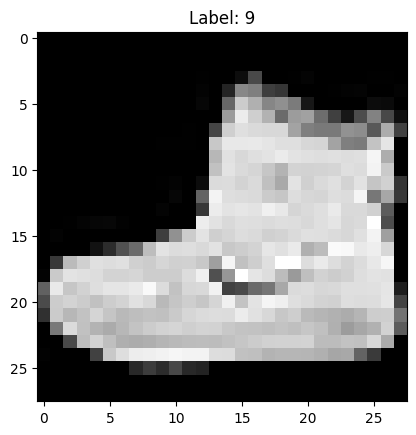

In [4]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [5]:
class_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
print(x_train.shape)

(60000, 28, 28, 1)


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,858 (433.04 KB)

 Trainable params: 110,666 (432.29 KB)

 Non-trainable params: 192 (768.00 B)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

In [13]:
his_train = model.fit(datagen.flow(x_train, y_train, batch_size=100), validation_data=(x_test, y_test), epochs=20, callbacks=[early_stop] )

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


600/600 ━━━━━━━━━━━━━━━━━━━━ 88s 135ms/step - accuracy: 0.6468 - loss: 0.9387 - val_accuracy: 0.6821 - val_loss: 0.7880
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 134s 123ms/step - accuracy: 0.7956 - loss: 0.5430 - val_accuracy: 0.8414 - val_loss: 0.4433
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 80s 119ms/step - accuracy: 0.8176 - loss: 0.4845 - val_accuracy: 0.8459 - val_loss: 0.4300
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 75s 125ms/step - accuracy: 0.8343 - loss: 0.4428 - val_accuracy: 0.8619 - val_loss: 0.3859
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 82s 126ms/step - accuracy: 0.8379 - loss: 0.4262 - val_accuracy: 0.8427 - val_loss: 0.4133
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 77s 117ms/step - accuracy: 0.8468 - loss: 0.4051 - val_accuracy: 0.8292 - val_loss: 0.4502
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 71s 118ms/step - accuracy: 0.8488 - loss: 0.3978 - val_accuracy: 0.8394 - val_loss: 0.4169
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 85s 123ms/step - accuracy: 0.8537 - loss: 0.3879 - va

In [14]:
his_train.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

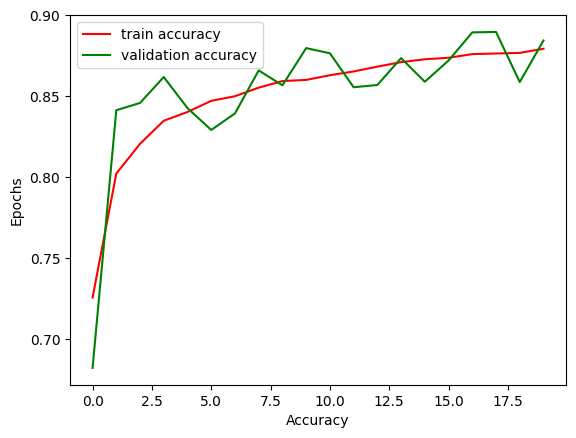

In [15]:
plt.plot(his_train.history['accuracy'], label ='train accuracy',color='red')
plt.plot(his_train.history['val_accuracy'], label = 'validation accuracy',color='green')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc = 'upper left')
plt.show()

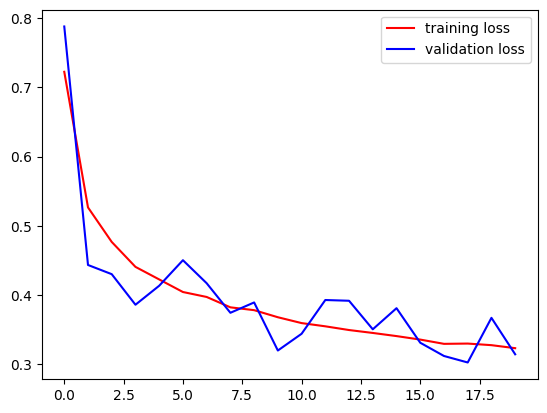

In [16]:
plt.plot(his_train.history['loss'], label = "training loss", color='red')
plt.plot(his_train.history['val_loss'], label = "validation loss", color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [17]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print(f'Test accuracy: {accuracy*100}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8813 - loss: 0.3210
Test loss: 0.31423503160476685
Test accuracy: 88.45000267028809


In [18]:
predicted_labels = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


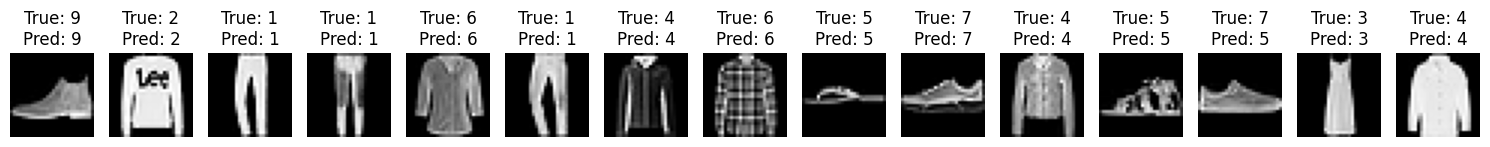

In [19]:
 sample_size = 15
 fig, axes = plt.subplots(1, sample_size, figsize=(15,5))
 for i in range(sample_size):
     axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
     axes[i].set_title(f"True: {y_test[i]}\nPred: {predicted_labels[i]}")
     axes[i].axis('off')

 plt.tight_layout()
 plt.show()

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.75      0.81      1000
           3       0.91      0.90      0.90      1000
           4       0.84      0.75      0.79      1000
           5       0.94      0.99      0.97      1000
           6       0.59      0.81      0.68      1000
           7       0.97      0.92      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.90      0.88      0.89     10000
weighted avg       0.90      0.88      0.89     10000



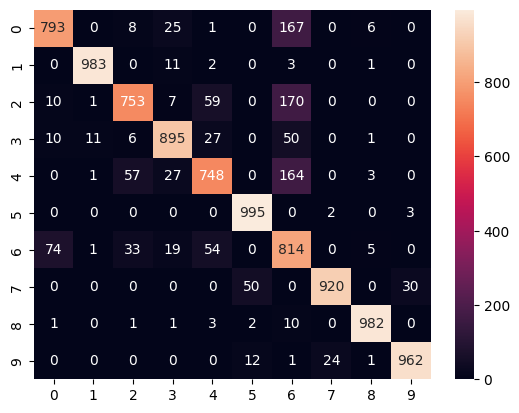

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_labels)
sns.heatmap(cm, annot=True,fmt='d')
print(classification_report(y_test, predicted_labels))


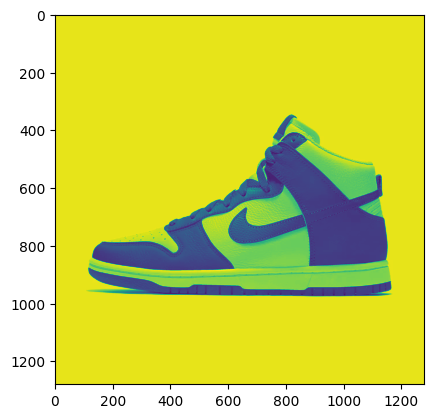

In [20]:
import cv2
import os
file_path = '/content/drive/MyDrive/DS IMG/custom-nike-dunk-high-by-you-shoes.webp'
if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
else:
    test = cv2.imread(file_path)
    if test is None:
        print(f"Error: Could not read image file. OpenCV might not support the '.avif' format.")
    else:
        grayscale = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
        plt.imshow(grayscale)
        plt.show()

In [21]:
grayscale.shape

(1280, 1280)

In [22]:
test_img = cv2.resize(grayscale,(28,28))
test_input  = test_img.reshape(1, 28, 28, 1)

In [23]:
test_input.shape

(1, 28, 28, 1)

In [24]:
prediction = model.predict(test_input)
predicted_label = prediction.argmax()
predicted_class = class_names.get(predicted_label+1, "Unknown")
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Predicted class: Ankle boot
